In [193]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [194]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [196]:
##We will do prediction based only on country, education level, experience years, employment status and final salary 

df = df[['Country', 'Employment', 'EdLevel', 'YearsCodePro', 'ConvertedCompYearly']]
df = df.rename({'ConvertedCompYearly':'Salary', 'YearsCodePro' : 'YearsExperience'})
df.head()

,Country,Employment,EdLevel,YearsCodePro,ConvertedCompYearly
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0
2,United States of America,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
4,Philippines,"Employed, full-time;Independent contractor, fr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,23456.0


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89184 entries, 0 to 89183
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              87973 non-null  object 
 1   Employment           87898 non-null  object 
 2   EdLevel              87973 non-null  object 
 3   YearsCodePro         66136 non-null  object 
 4   ConvertedCompYearly  48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.1+ MB


In [198]:
df.isnull().sum()

Country                 1211
Employment              1286
EdLevel                 1211
YearsCodePro           23048
ConvertedCompYearly    41165
dtype: int64

In [199]:
df = df.dropna()

df.isnull().sum()

Country                0
Employment             0
EdLevel                0
YearsCodePro           0
ConvertedCompYearly    0
dtype: int64

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47813 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              47813 non-null  object 
 1   Employment           47813 non-null  object 
 2   EdLevel              47813 non-null  object 
 3   YearsCodePro         47813 non-null  object 
 4   ConvertedCompYearly  47813 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [201]:
print(df['Employment'].unique())

['Employed, full-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Independent contractor, freelancer, or self-employed'
 'Employed, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Employed, full-time;Employed, part-time' 'Retired'
 'Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Independent contractor, freelancer, or self-employed;Employed, part-time;Retired'
 'I prefer not to say'
 'Independent contractor, freelancer, or self-employed;Retired'
 'Employed, full-time;Retired' 'Employed, part-time;Retired'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired']


In [202]:
#Only need employed, full time

df = df[df['Employment'] == 'Employed, full-time']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39155 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              39155 non-null  object 
 1   Employment           39155 non-null  object 
 2   EdLevel              39155 non-null  object 
 3   YearsCodePro         39155 non-null  object 
 4   ConvertedCompYearly  39155 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


In [203]:
df = df.drop('Employment', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39155 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              39155 non-null  object 
 1   EdLevel              39155 non-null  object 
 2   YearsCodePro         39155 non-null  object 
 3   ConvertedCompYearly  39155 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [204]:
df['Country'].value_counts()

Country
United States of America                                10569
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
                                                        ...  
Botswana                                                    1
Sierra Leone                                                1
Guyana                                                      1
Guinea-Bissau                                               1
Antigua and Barbuda                                         1
Name: count, Length: 165, dtype: int64

In [205]:
def shorten(categories, cut):
    category_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cut:
            category_map[categories.index[i]] = categories.index[i]
        else:
            category_map[categories.index[i]] = 'Others'
    return category_map

In [206]:
df['Country'].value_counts()

Country
United States of America                                10569
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
                                                        ...  
Botswana                                                    1
Sierra Leone                                                1
Guyana                                                      1
Guinea-Bissau                                               1
Antigua and Barbuda                                         1
Name: count, Length: 165, dtype: int64

In [207]:
country_dict = shorten(df['Country'].value_counts(), 1000)
df['Country'] = df['Country'].map(country_dict)
df['Country'].value_counts()

Country
Others                                                  16446
United States of America                                10569
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1458
Netherlands                                              1002
Name: count, dtype: int64

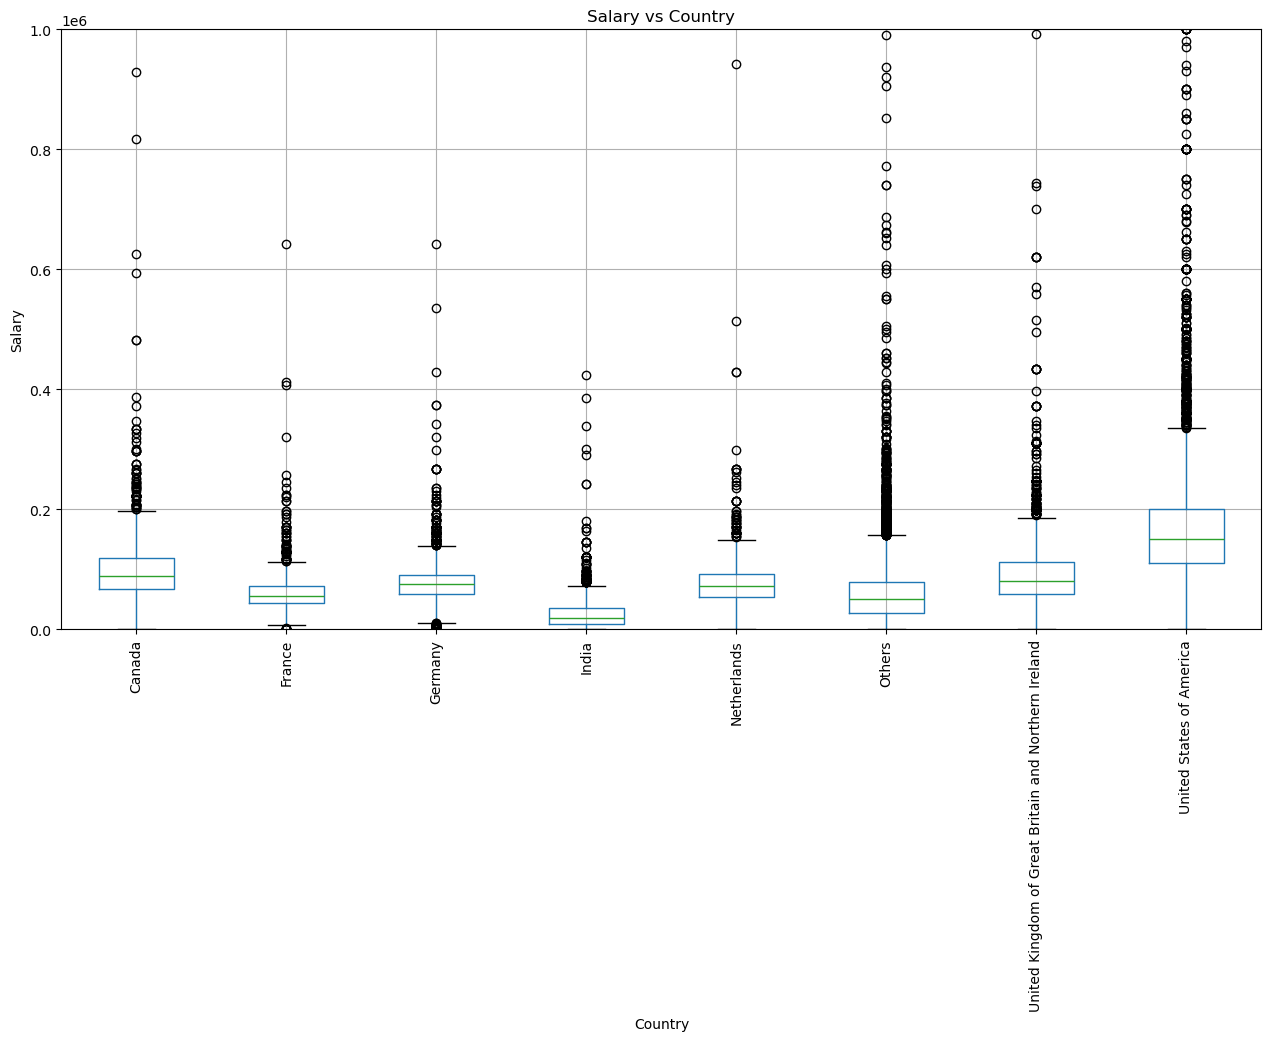

In [208]:
fig, ax = plt.subplots(1, 1, figsize = (15,8))
df.boxplot('ConvertedCompYearly', 'Country', ax=ax)
plt.title('Salary vs Country')
plt.suptitle('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.ylim(0, 1000000)
plt.show()

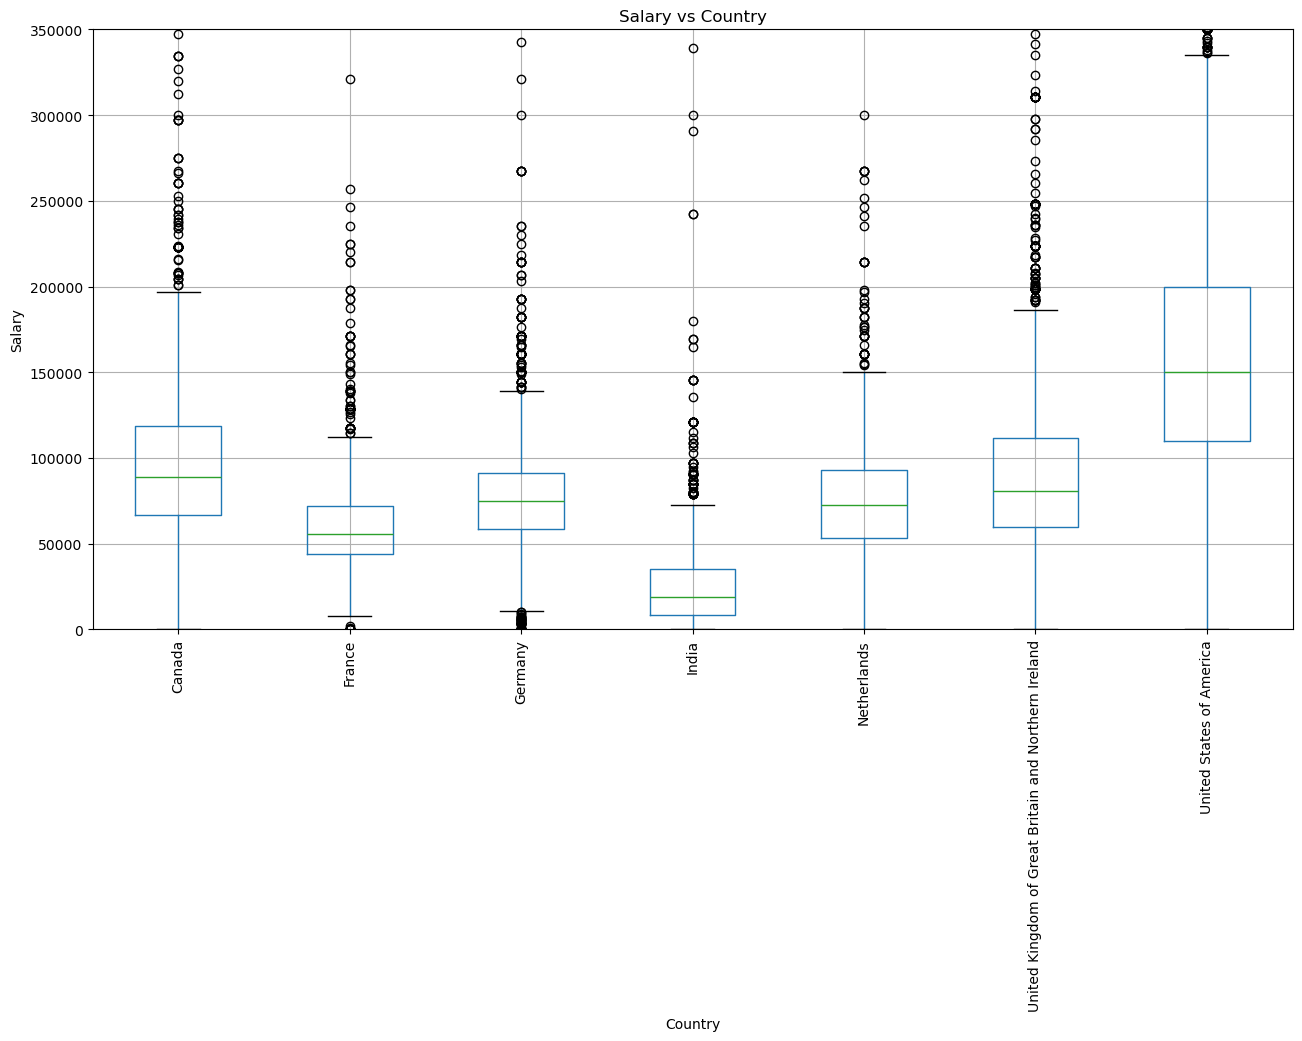

In [209]:
#There is too much outlier in Others category, so we will decide to erase them 
df = df[df['Country'] != 'Others']

fig, ax = plt.subplots(1, 1, figsize = (15,8))
df.boxplot('ConvertedCompYearly', 'Country', ax=ax)
plt.title('Salary vs Country')
plt.suptitle('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.ylim(0, 350000)
plt.show()

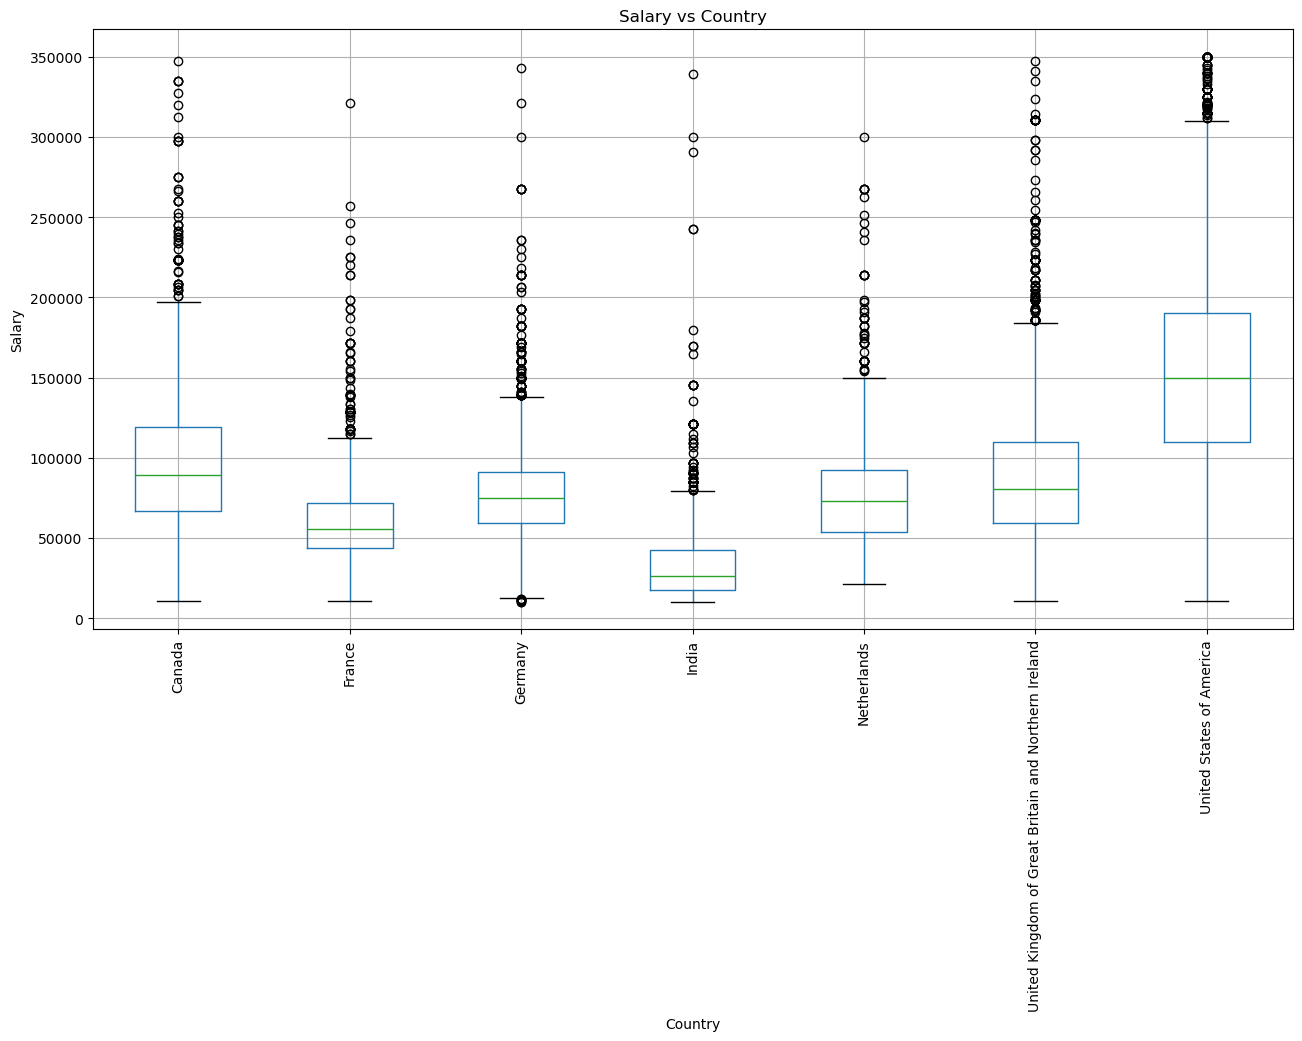

In [210]:
df = df[df['ConvertedCompYearly'] <= 350000]
df = df[df['ConvertedCompYearly'] >= 10000]

fig, ax = plt.subplots(1, 1, figsize = (15,8))
df.boxplot('ConvertedCompYearly', 'Country', ax=ax)
plt.title('Salary vs Country')
plt.suptitle('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [211]:
df['YearsCodePro'].unique()

array(['9', '23', '7', '21', '3', 'Less than 1 year', '10', '6', '14',
       '5', '2', '15', '16', '24', '25', '12', '20', '8', '19', '27', '4',
       '43', '38', '33', '29', '22', '13', '1', '11', '28', '17', '42',
       '26', '31', '30', '36', '39', '18', '34', '40', '32', '44', '37',
       '35', '48', 'More than 50 years', '41', '50', '46', '45', '49',
       '47'], dtype=object)

In [212]:
def clean_year(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_year)
df['YearsCodePro'].unique()

array([ 9. , 23. ,  7. , 21. ,  3. ,  0.5, 10. ,  6. , 14. ,  5. ,  2. ,
       15. , 16. , 24. , 25. , 12. , 20. ,  8. , 19. , 27. ,  4. , 43. ,
       38. , 33. , 29. , 22. , 13. ,  1. , 11. , 28. , 17. , 42. , 26. ,
       31. , 30. , 36. , 39. , 18. , 34. , 40. , 32. , 44. , 37. , 35. ,
       48. , 50. , 41. , 46. , 45. , 49. , 47. ])

In [213]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Something else'], dtype=object)

In [214]:
def clean_edu(x):
    if 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)' in x:
        return 'Bachelor degree'
    if 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)' in x:
        return 'Master degree'
    if 'Professional degree' in x:
        return 'Post graduate'
    return 'Lower than Bachelor'

df['EdLevel'] = df['EdLevel'].apply(clean_edu)
df['EdLevel'].unique()

array(['Bachelor degree', 'Lower than Bachelor', 'Master degree',
       'Post graduate'], dtype=object)

In [215]:
from sklearn.preprocessing import LabelEncoder
le_ed = LabelEncoder()
df['EdLevel'] = le_ed.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 1, 2, 3])

In [216]:
le_cy = LabelEncoder()
df['Country'] = le_cy.fit_transform(df['Country'])
df['Country'].unique()

array([6, 5, 4, 2, 1, 0, 3])

In [217]:
df.head()

,Country,EdLevel,YearsCodePro,ConvertedCompYearly
1,6,0,9.0,285000.0
2,6,0,23.0,250000.0
3,6,0,7.0,156000.0
5,5,1,21.0,96828.0
6,6,1,3.0,135000.0


In [218]:
df = df.rename(columns={"ConvertedCompYearly": "Salary"})
df.head()

,Country,EdLevel,YearsCodePro,Salary
1,6,0,9.0,285000.0
2,6,0,23.0,250000.0
3,6,0,7.0,156000.0
5,5,1,21.0,96828.0
6,6,1,3.0,135000.0


In [219]:
#Modelling
X = df.drop('Salary', axis = 1)
y = df['Salary']

from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [220]:
y_pred = linear_reg.predict(X)

In [221]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
err = np.sqrt(mean_squared_error(y, y_pred))
err

54173.59886502796

In [222]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X, y.values)

DecisionTreeRegressor()

In [223]:
y_pred = dec_tree.predict(X)

In [224]:
err = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(err))

$44,410.07


In [225]:
from sklearn.ensemble import RandomForestRegressor
random_reg = RandomForestRegressor(random_state = 0)
random_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [226]:
y_pred = random_reg.predict(X)

In [227]:
err = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(err))

$44,448.00


In [228]:
#grid search cross validation
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {'max_depth' : max_depth}

reg = DecisionTreeRegressor(random_state = 0)
grids = GridSearchCV(reg, parameters, scoring ='neg_mean_squared_error')
grids.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [229]:
reg = grids.best_estimator_
reg.fit(X, y.values)
y_pred = reg.predict(X)
err = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(err))

$45,161.35


In [230]:
X

,Country,EdLevel,YearsCodePro
1,6,0,9.0
2,6,0,23.0
3,6,0,7.0
5,5,1,21.0
6,6,1,3.0
...,...,...,...
89155,0,1,0.5
89156,6,0,8.0
89157,0,0,12.0
89167,3,0,2.0


In [231]:
Xa = np.array([["United States of America", 'Master degree', 15]])
Xa

array([['United States of America', 'Master degree', '15']], dtype='<U24')

In [232]:
Xa[:, 0] = le_cy.transform(Xa[:, 0])
Xa[:, 1] = le_ed.transform(Xa[:, 1])
Xa = Xa.astype(float)
Xa

array([[ 6.,  2., 15.]])

In [235]:
y_pred = dec_tree.predict(Xa)
y_pred

C:\Users\Rakhmad Fajar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([190017.07407407])

In [236]:
import pickle 

data = {"model": dec_tree, 'le_cy': le_cy, 'le_ed': le_ed}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
with open('saved_steps.pkl', 'rb') as file:
    